In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Load Data for Visualization and maybe feature engineering


In [234]:
df_train = pd.read_csv('.../sepsis_train.csv')
df_test = pd.read_csv('.../sepsis_test.csv')

print(f'TRAINING DATA:\n{df_train.head(10)}')
print(f'TEST DATA:\n{df_test.head(10)}')

TRAINING DATA:
          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
5  ICU200015    5  116  74   0    0  25.6  0.201   30          1  Negative
6  ICU200016    3   78  50  32   88  31.0  0.248   26          0  Positive
7  ICU200017   10  115   0   0    0  35.3  0.134   29          1  Negative
8  ICU200018    2  197  70  45  543  30.5  0.158   53          1  Positive
9  ICU200019    8  125  96   0    0   0.0  0.232   54          1  Positive
TEST DATA:
          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  

Combined the two set for easier data preprocessing and visualization



In [235]:
df = pd.DataFrame()
df = pd.concat([df_train,df_test])
print(df)

            ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
164  ICU200773   10  101  76  48  180  32.9  0.171   63          1       NaN
165  ICU200774    2  122  70  27    0  36.8  0.340   27          1       NaN
166  ICU200775    5  121  72  23  112  26.2  0.245   30          1       NaN
167  ICU200776    1  126  60   0    0  30.1  0.349   47          1       NaN
168  ICU200777    1   93  70  31    0  30.4  0.315   23          1       NaN

[768 rows x 11 columns]


In [248]:
X_combined = df.drop(['Sepssis', 'ID'],axis=1)

y_combined = df['Sepssis']
y_combined = y.replace({'Positive':1, 'Negative':0})



print(X,y)


     PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0      6  148  72  35    0  33.6  0.627   50          0
1      1   85  66  29    0  26.6  0.351   31          0
2      8  183  64   0    0  23.3  0.672   32          1
3      1   89  66  23   94  28.1  0.167   21          1
4      0  137  40  35  168  43.1  2.288   33          1
..   ...  ...  ..  ..  ...   ...    ...  ...        ...
164   10  101  76  48  180  32.9  0.171   63          1
165    2  122  70  27    0  36.8  0.340   27          1
166    5  121  72  23  112  26.2  0.245   30          1
167    1  126  60   0    0  30.1  0.349   47          1
168    1   93  70  31    0  30.4  0.315   23          1

[768 rows x 9 columns] 0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
164    NaN
165    NaN
166    NaN
167    NaN
168    NaN
Name: Sepssis, Length: 768, dtype: float64


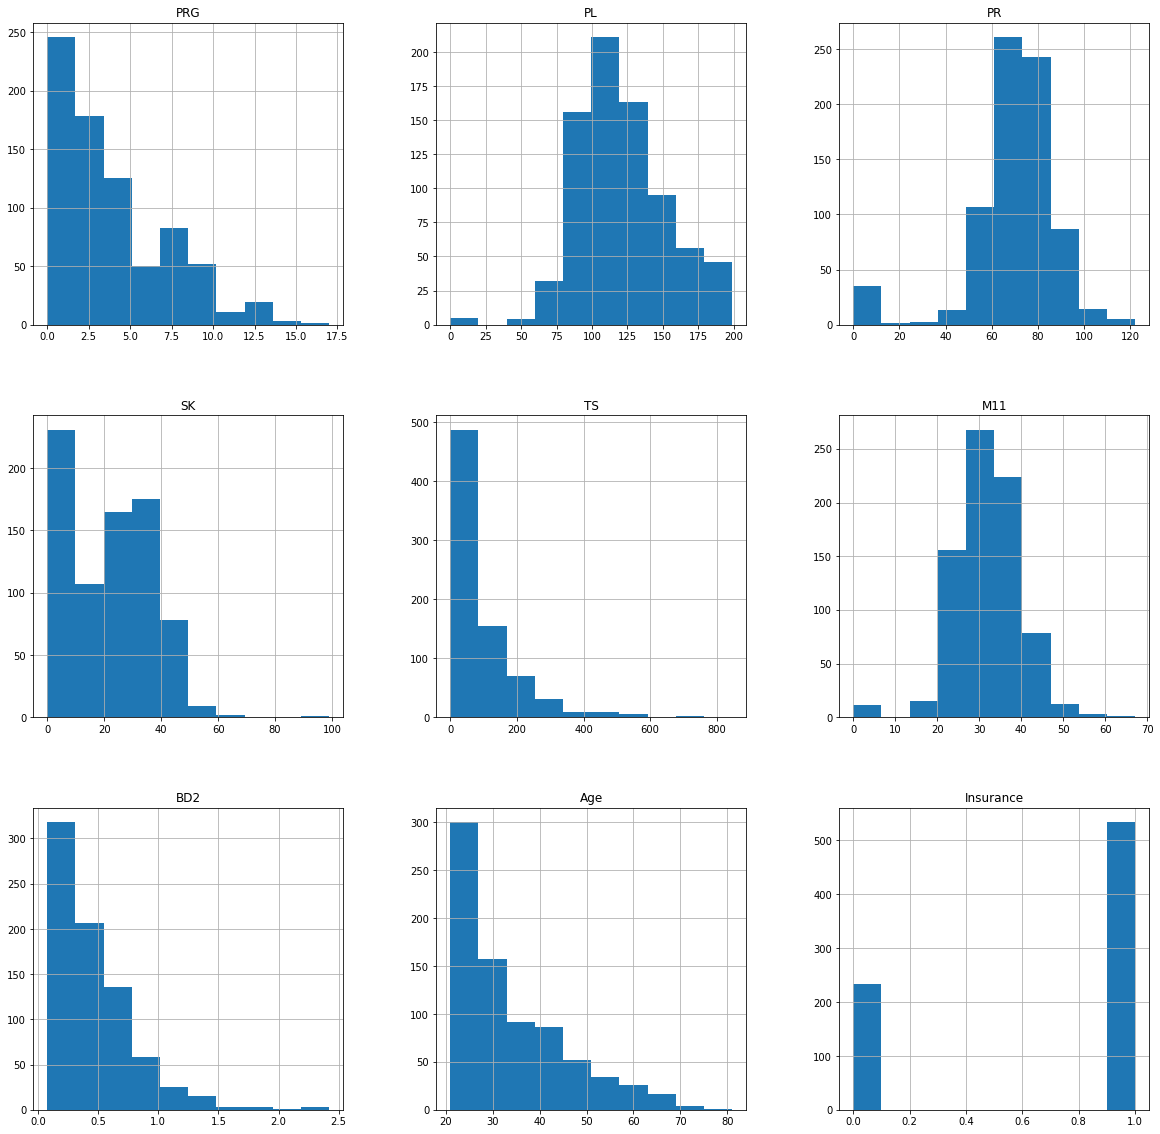

In [249]:
X_combined.hist(figsize=(20,20))
plt.show()

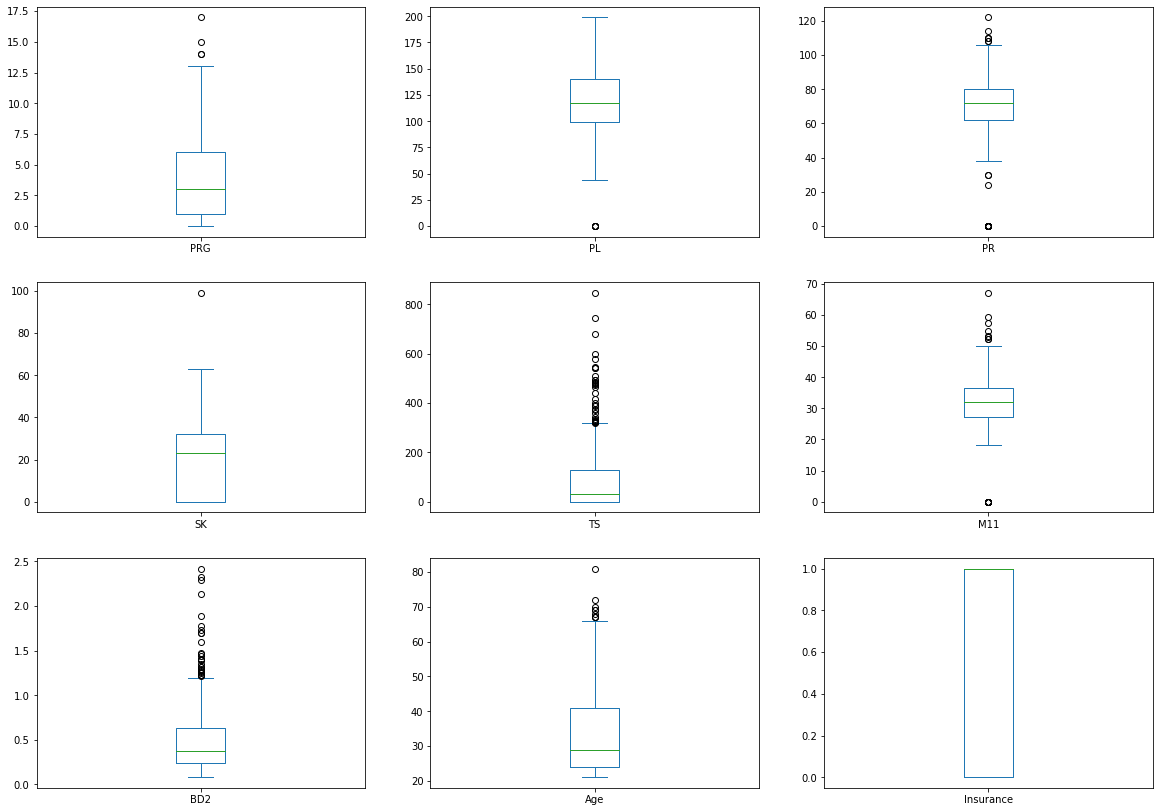

In [238]:
df.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize=(20, 60))
plt.show()

Preprocessing


In [239]:

df.isnull().sum()
'''We can see there are alot of null values but looking careful at the data we see that these null are from the 
test dataset so there is not much data-preprocessing to do except to look for outliers in the dataset
'''



'We can see there are alot of null values but looking careful at the data we see that these null are from the \ntest dataset so there is not much data-preprocessing to do except to look for outliers in the dataset\n'

In [240]:
#preview of data statistics

df_copy = df.copy()
df_copy = df_copy.drop(['Sepssis'],axis=1)
df_copy.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.695312
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.460575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [250]:
#Dealing with Outliers


X_copy = X_combined.drop(['Insurance'],axis=1) #dropping insurance so we can detect outliers in other features

Q1 = X_copy.quantile(0.25)
Q3 = X_copy.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR




X_outlier = X_copy[~((X_copy < (lower_bound)) |(X_copy > (upper_bound))).any(axis=1)]


print(f'BEFORE REMOVAL OF OUTERLIER WITH IQR: {len(X_copy)}')
print(f'AFTER REMOVAL OF OUTLIER WITH IQR: {len(X_outlier)}')
print('-------------------------------------------------------')
print('Decision: we will not drop the outlier and continue to use the original X as removing the outlier would result in too much lost of data in this already small dataset')


BEFORE REMOVAL OF OUTERLIER WITH IQR: 768
AFTER REMOVAL OF OUTLIER WITH IQR: 639
-------------------------------------------------------
Decision: we will not drop the outlier and continue to use the original X as removing the outlier would result in too much lost of data in this already small dataset


Split data for training and testing


In [251]:
''' We concat the two dataframe ealier for easy prepocessing. Since there were no changes made to either
files, we will proceed use the original df_train for training the model and df_test for testing'''

X_df_train = df_train.drop(['Sepssis', 'ID'],axis=1)

y_df_train = y_df_train.replace({'Positive':1,'Negative':0})

X_valid = df_test.drop(['ID'],axis=1) #Featureus from the actual test file

print(X_df_train)
print(y_df_train)
X_train, X_test,y_train,y_test = train_test_split(X_df_train,y_df_train,random_state=42,train_size=0.8)

     PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0      6  148  72  35    0  33.6  0.627   50          0
1      1   85  66  29    0  26.6  0.351   31          0
2      8  183  64   0    0  23.3  0.672   32          1
3      1   89  66  23   94  28.1  0.167   21          1
4      0  137  40  35  168  43.1  2.288   33          1
..   ...  ...  ..  ..  ...   ...    ...  ...        ...
594    6  123  72  45  230  33.6  0.733   34          0
595    0  188  82  14  185  32.0  0.682   22          1
596    0   67  76   0    0  45.3  0.194   46          1
597    1   89  24  19   25  27.8  0.559   21          0
598    1  173  74   0    0  36.8  0.088   38          1

[599 rows x 9 columns]
0      1
1      0
2      1
3      0
4      1
      ..
594    0
595    1
596    0
597    0
598    1
Name: Sepssis, Length: 599, dtype: int64


In [252]:
'''Standard Scaler (Standardization) to turn our data into a normal distributed dataset '''
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_valid = sc.fit_transform(X_valid)
print(X_train)
print(X_valid)

[[-1.13431763 -0.5620614   0.32794411 ...  0.29869943 -1.04868446
   0.64587906]
 [ 1.22289775  0.16592243  1.45189293 ... -0.76048427  1.72609881
   0.64587906]
 [ 2.40150545  0.64069449  0.70259372 ...  0.1616286   2.06243618
   0.64587906]
 ...
 [ 1.8122016  -0.59371287  0.91667921 ...  2.05569826  0.38074935
  -1.54827747]
 [-1.13431763  0.67234596 -3.68615883 ... -0.84459591 -0.37600973
   0.64587906]
 [-1.13431763  0.16592243  1.45189293 ... -0.66702688 -1.04868446
   0.64587906]]
[[-0.85992703 -0.49775457 -1.6740992  ... -0.10416024 -0.61361425
   0.6115421 ]
 [-0.85992703 -0.53203351  0.90731289 ... -0.12703411 -0.78731745
   0.6115421 ]
 [ 0.61398441 -0.94338081 -3.63597238 ... -0.81325033 -0.43991106
   0.6115421 ]
 ...
 [ 0.31920212 -0.08640727  0.08126102 ... -0.63352704 -0.26620786
   0.6115421 ]
 [-0.85992703  0.08498743 -0.53827788 ... -0.29368662  1.21026932
   0.6115421 ]
 [-0.85992703 -1.04621763 -0.02199546 ... -0.4047883  -0.87416905
   0.6115421 ]]


Training the Model


In [253]:
rf = RandomForestClassifier(random_state=168)
params = {'n_estimators':[100,200,300],
        'max_depth':[5,8,25,30],
        'min_samples_split':[2,5,10,15,100],
        'min_samples_leaf':[1,2,5,10]}

grid = GridSearchCV(rf,params,cv=5,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

rf = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
                            max_depth=grid.best_params_['max_depth'],
                            min_samples_split=grid.best_params_['min_samples_split'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            random_state=168)


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [254]:
print(f"BEST PARAMETERS:/n {grid.best_params_}")

print(f'/nTRAINING ACCURACY {accuracy_score(y_train,rf.predict(X_train))}')
print(f'/nTESTIG ACCURACY {accuracy_score(y_test, rf.predict(X_test))}')
print(f'/nTRAINING PRECISION {precision_score(y_train,rf.predict(X_train))}')
print(f'/nTESTIG PRECISION {precision_score(y_test, rf.predict(X_test))}')
print(f'/nTRAINING RECALL {recall_score(y_train,rf.predict(X_train))}')
print(f'/nTESTIG RECALL {recall_score(y_test, rf.predict(X_test))}')
print(f'/nTRAINING F1 Score {f1_score(y_train,rf.predict(X_train))}')
print(f'/nTESTIG F1 Score {f1_score(y_test, rf.predict(X_test))}')


print(f'FIRST 10 PREDICTIONS {y_pred[:10]}')
print(f'FIRST 10 ACTUALS {y_test[:10].values}')



BEST PARAMETERS:/n {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
/nTRAINING ACCURACY 0.9853862212943633
/nTESTIG ACCURACY 0.7333333333333333
/nTRAINING PRECISION 0.99375
/nTESTIG PRECISION 0.6222222222222222
/nTRAINING RECALL 0.9636363636363636
/nTESTIG RECALL 0.6511627906976745
/nTRAINING F1 Score 0.9784615384615384
/nTESTIG F1 Score 0.6363636363636364
FIRST 10 PREDICTIONS [1 0 0 0 0 0 0 1 1 0]
FIRST 10 ACTUALS [1 1 0 0 0 1 0 0 1 1]


In [255]:
#now lets use our model to predict from the actual test file

y_valid =pd.DataFrame(rf.predict(X_valid), columns=(['Sepssis'])).replace({0:'Negative', 1:'Positive'})

y_valid_file = pd.concat([df_test, y_valid],axis=1) #combining the prediction and the actual test file

print(f'FIRST 10 PREDICTIONS FROM TEST FILE {y_valid[:10]}')
print(y_valid_file)



FIRST 10 PREDICTIONS FROM TEST FILE     Sepssis
0  Negative
1  Negative
2  Negative
3  Negative
4  Positive
5  Positive
6  Negative
7  Positive
8  Negative
9  Positive
            ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200609    1  109  38  18  120  23.1  0.407   26          1  Negative
1    ICU200610    1  108  88  19    0  27.1  0.400   24          1  Negative
2    ICU200611    6   96   0   0    0  23.7  0.190   28          1  Negative
3    ICU200612    1  124  74  36    0  27.8  0.100   30          1  Negative
4    ICU200613    7  150  78  29  126  35.2  0.692   54          0  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
164  ICU200773   10  101  76  48  180  32.9  0.171   63          1  Negative
165  ICU200774    2  122  70  27    0  36.8  0.340   27          1  Negative
166  ICU200775    5  121  72  23  112  26.2  0.245   30          1  Negative
167  ICU200776    1  126  60   0    0  30.1  0.349   47       

We can also try training using XGBoost 

In [256]:
#XGBoost params


xgb = XGBClassifier(random_state=168)

xgb_params = {
    'learning_rate':[0.01],
    'min_child_weight':[1,5,10],
    'gamma':[0.5,1,1.5,2,5],
    'subsample':[0.5,0.8,1.0],
    'colsample_bytree':[0.6,0.8,1.0],
    'max_depth':[3,4,5]
    

}

xgb_grid = GridSearchCV(xgb,xgb_params,n_jobs=5,verbose=2,refit=True)
xgb_grid.fit(X_train,y_train)

print(f"BEST PARAMETERS:/n {xgb_grid.best_params_}")


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     n

In [262]:
#use params from the grid search



xgb = XGBClassifier(
    min_child_weight=xgb_grid.best_params_['min_child_weight'],
    gamma=xgb_grid.best_params_['gamma'],
    subsample=xgb_grid.best_params_['subsample'],
    colsample_bytree=xgb_grid.best_params_['colsample_bytree'],
    max_depth=xgb_grid.best_params_['max_depth'],
    learning_rate=0.01,
    nthread=1,
    random_state=168

)


xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)



In [264]:

print(f'/nTRAINING ACCURACY {accuracy_score(y_train,xgb.predict(X_train))}')
print(f'/nTESTIG ACCURACY {accuracy_score(y_test, xgb.predict(X_test))}')
print(f'/nTRAINING PRECISION {precision_score(y_train,xgb.predict(X_train))}')
print(f'/nTESTIG PRECISION {precision_score(y_test, xgb.predict(X_test))}')
print(f'/nTRAINING RECALL {recall_score(y_train,xgb.predict(X_train))}')
print(f'/nTESTIG RECALL {recall_score(y_test, xgb.predict(X_test))}')
print(f'/nTRAINING F1 Score {f1_score(y_train,xgb.predict(X_train))}')
print(f'/nTESTIG F1 Score {f1_score(y_test, xgb.predict(X_test))}')

print(f'FIRST 10 PREDICTIONS {y_pred[:10]}')
print(f'FIRST 10 ACTUALS {y_test[:10].values}')



/nTRAINING ACCURACY 0.8663883089770354
/nTESTIG ACCURACY 0.7083333333333334
/nTRAINING PRECISION 0.8740740740740741
/nTESTIG PRECISION 0.5952380952380952
/nTRAINING RECALL 0.7151515151515152
/nTESTIG RECALL 0.5813953488372093
/nTRAINING F1 Score 0.7866666666666667
/nTESTIG F1 Score 0.5882352941176471
FIRST 10 PREDICTIONS [1 0 0 0 0 0 0 1 1 0]
FIRST 10 ACTUALS [1 1 0 0 0 1 0 0 1 1]
